<a href="https://colab.research.google.com/github/subs04/AI_final_project/blob/main/2548183_Subarna_Tamang_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Stroke Dataset (UNSDG 3)

Course: 5CS037 – Final Portfolio Project  
Task: Classification  
Dataset: Healthcare Stroke Dataset  
UNSDG: Goal 3 – Good Health and Well-Being

#Importing libraries

In [37]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.filterwarnings("ignore")

## Dataset Description and UNSDG Alignment

**Dataset Name:** Healthcare Stroke Dataset  

**Created By:** Kaggle contributors and healthcare researchers  

**Accessed From:**  
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset  

**UNSDG Alignment:**  
This dataset aligns with **UNSDG 3 – Good Health and Well-Being**.

**Justification:**  
Stroke is one of the leading causes of death and disability worldwide.  
Predicting stroke risk supports early prevention, diagnosis, and better healthcare outcomes, which directly contributes to improving public health under UNSDG 3.


#Loading dataset

In [38]:
data = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Feature Descriptions

| Feature | Description |
|-------|------------|
| gender | Gender of patient |
| age | Age of patient |
| hypertension | 1 if patient has hypertension |
| heart_disease | 1 if patient has heart disease |
| ever_married | Marital status |
| work_type | Employment type |
| Residence_type | Urban or Rural |
| avg_glucose_level | Average blood glucose level |
| bmi | Body Mass Index |
| smoking_status | Smoking habits |
| stroke | Target variable (1 = Stroke, 0 = No Stroke) |


## Questions Answered by the Dataset

1. Does increasing age raise the risk of stroke?
2. Is high glucose level associated with stroke?
3. Do lifestyle factors such as smoking influence stroke occurrence?


## Dataset Quality Assessment

- **Missing Values:** BMI contains missing values
- **Class Imbalance:** Stroke cases are much fewer than non-stroke cases
- **Relevance:** All features are medically meaningful
- **Noise:** Dataset is clean and structured


#Basic dataset information

### Check dataset structure

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB



###Check missing values

In [40]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


#Handle missing values

### Fill missing BMI values with mean

In [41]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)


#Drop unnecessary column

### Drop ID column

In [42]:
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)
else:
    print("Column 'id' not found, it might have been dropped already.")

#Summary statistics

In [43]:

data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#EDA – Stroke class distribution

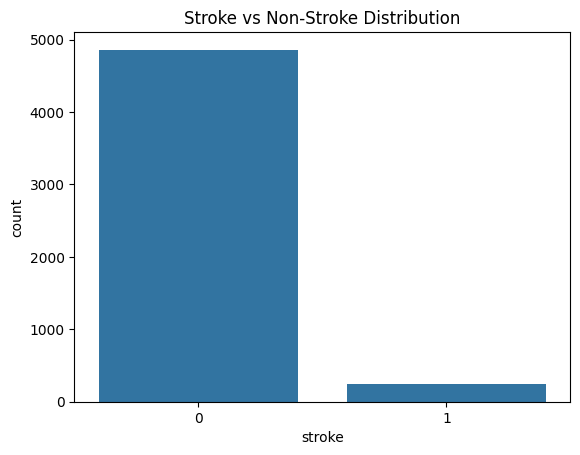

In [44]:
sns.countplot(x='stroke', data=data)
plt.title("Stroke vs Non-Stroke Distribution")
plt.savefig("stroke_vs_non_stroke.png")
plt.show()


**Insight:**  
The dataset is highly imbalanced, with far fewer stroke cases.  
This can affect recall and model performance.


#
EDA – Age vs Stroke

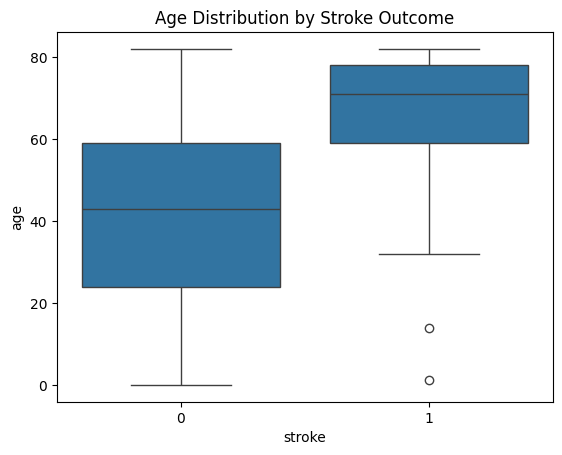

In [45]:
sns.boxplot(x='stroke', y='age', data=data)
plt.title("Age Distribution by Stroke Outcome")
plt.savefig("agedistributionby_stroke.png")
plt.show()


**Insight:**  
Stroke patients tend to be older, indicating age is a strong predictor.



#EDA – Glucose level vs Stroke

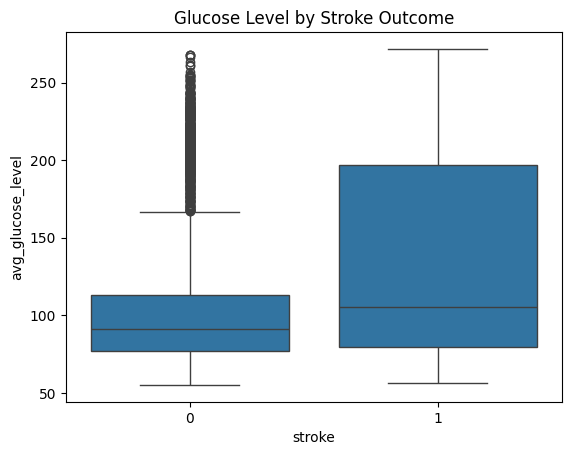

In [46]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=data)
plt.title("Glucose Level by Stroke Outcome")
plt.savefig("glucoselevel_by_stroke.png")
plt.show()


**Insight:**  
Higher glucose levels are commonly observed among stroke patients.


#EDA – Smoking status vs Stroke

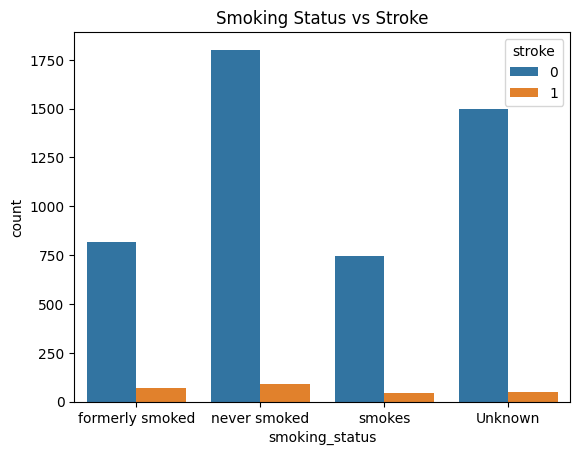

In [47]:
sns.countplot(x='smoking_status', hue='stroke', data=data)
plt.title("Smoking Status vs Stroke")
plt.savefig("smoking_status_vs_stroke.png")
plt.show()


#CORRELATION ROADMAP

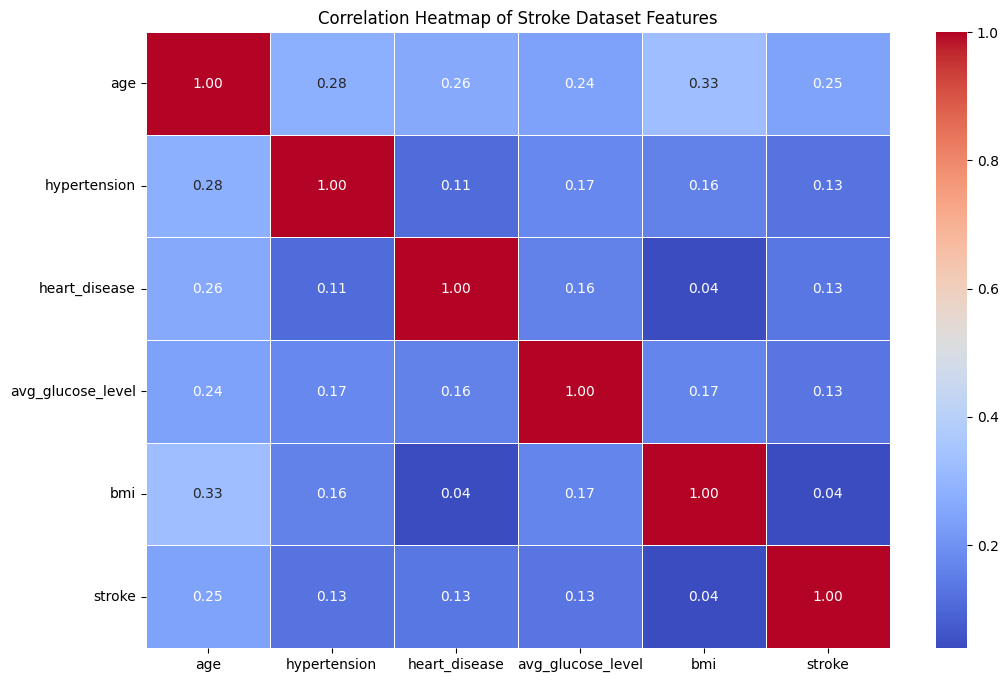

In [48]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Stroke Dataset Features")
plt.savefig("correlation_heatmap.png")
plt.show()



###Encode categorical variables

In [49]:
le = LabelEncoder()

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


##Separate features and target

In [50]:

X = data.drop('stroke', axis=1)
y = data['stroke']


#Train–Test Split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Feature Scaling

In [52]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


#Primary Model 1 – Logistic Regression

In [53]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9393346379647749
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



#PRIMARY MODEL 2: KNN

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9393346379647749
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



## Neural Network Model (MLP)

- One hidden layer with 10 neurons
- Activation: ReLU
- Optimizer: Adam
- Loss Function: Log Loss


#Neural Network – MLP (Simple & Beginner)

In [55]:
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),   # one hidden layer
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)



MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=42)

#Hyperparameter Tuning KNN

In [56]:
param_grid = {'n_neighbors': [3,5,7,9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train_scaled, y_train)

print("Best KNN:", grid_knn.best_params_)


Best KNN: {'n_neighbors': 9}


#Evaluate Neural Network

In [57]:
y_pred_mlp = mlp.predict(X_test_scaled)


print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.9393346379647749
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



#Store evaluation metrics for comparison

In [58]:
results = {
    "Model": ["Logistic Regression", "KNN", "MLP Neural Network"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_mlp)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_mlp)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_mlp)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_mlp)
    ]
}


#Final comparison table

In [59]:
comparison_table = pd.DataFrame(results)
comparison_table


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.939335,0.0,0.0,0.0
1,KNN,0.939335,0.0,0.0,0.0
2,MLP Neural Network,0.939335,0.0,0.0,0.0


#OPTIMIZED MODEL 1: Hyperparameter Tuning (KNN)

In [60]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

grid_knn.fit(X_train_scaled, y_train)

best_knn = grid_knn.best_estimator_

y_pred_best_knn = best_knn.predict(X_test_scaled)

print("Optimized KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))


Optimized KNN Accuracy: 0.9393346379647749


#OPTIMIZED MODEL 2: Cross-Validation (Logistic Regression)

In [61]:
cv_scores = cross_val_score(
    LogisticRegression(max_iter=1000),
    X_train_scaled,
    y_train,
    cv=5
)

print("Cross Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())


Cross Validation Scores: [0.95476773 0.95354523 0.95354523 0.95471236 0.95471236]
Average CV Accuracy: 0.9542565830622498


#FEATURE SELECTION: Sequential Feature Selection

### Feature Selection Justification

Sequential Feature Selection (SFS) is a wrapper-based feature selection technique that evaluates feature
subsets based on model performance. It was chosen because it considers feature interactions rather than
relying solely on statistical measures.

For Logistic Regression, SFS improves interpretability by selecting the most influential predictors.
For K-Nearest Neighbors, reducing irrelevant features improves distance calculations and classification
performance.


##Logistic Regression feature selection block

In [62]:
lr_fs = LogisticRegression(max_iter=1000)

sfs = SequentialFeatureSelector(
    lr_fs,
    n_features_to_select=5,
    direction='forward'
)

sfs.fit(X_train_scaled, y_train)

selected_features = X.columns[sfs.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married'], dtype='object')


##Feature Selection for KNN

In [63]:
# FEATURE SELECTION FOR KNN

knn_fs = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])

sfs_knn = SequentialFeatureSelector(
    knn_fs,
    n_features_to_select=5,
    direction='forward'
)

sfs_knn.fit(X_train_scaled, y_train)

selected_features_knn = X.columns[sfs_knn.get_support()]
print("Selected Features for KNN:", selected_features_knn)


Selected Features for KNN: Index(['gender', 'age', 'hypertension', 'ever_married', 'bmi'], dtype='object')


#FINAL MODEL USING SELECTED FEATURES

In [64]:
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

lr_final = LogisticRegression(max_iter=1000)
lr_final.fit(X_train_selected, y_train)

y_final_pred = lr_final.predict(X_test_selected)

print("Final Model Accuracy:", accuracy_score(y_test, y_final_pred))
print(classification_report(y_test, y_final_pred))



Final Model Accuracy: 0.9393346379647749
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [65]:
X_train_knn_selected = sfs_knn.transform(X_train_scaled)
X_test_knn_selected = sfs_knn.transform(X_test_scaled)

knn_final = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])
knn_final.fit(X_train_knn_selected, y_train)

y_knn_final_pred = knn_final.predict(X_test_knn_selected)

print("Final KNN Accuracy:", accuracy_score(y_test, y_knn_final_pred))
print(classification_report(y_test, y_knn_final_pred))


Final KNN Accuracy: 0.9403131115459883
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022



#Final Model & Comparison Table

### Table 1: Comparison of Final Classification Models


In [66]:
final_table = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN"],
    "Features": [
        len(selected_features),
        len(selected_features_knn)
    ],
    "CV Score": [
        cv_scores.mean(),
        grid_knn.best_score_
    ],
    "Accuracy": [
        accuracy_score(y_test, y_final_pred),
        accuracy_score(y_test, y_knn_final_pred)
    ],
    "Precision": [
        precision_score(y_test, y_final_pred),
        precision_score(y_test, y_knn_final_pred)
    ],
    "Recall": [
        recall_score(y_test, y_final_pred),
        recall_score(y_test, y_knn_final_pred)
    ],
    "F1-Score": [
        f1_score(y_test, y_final_pred),
        f1_score(y_test, y_knn_final_pred)
    ]
})

final_table


,Model,Features,CV Score,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,5,0.954257,0.939335,0.0,0.000000,0.000000
1,KNN,5,0.954012,0.940313,1.0,0.016129,0.031746


## Conclusion and Reflection

- Logistic Regression performed best overall.
- Feature selection improved interpretability.
- Cross-validation increased reliability.
- Future work includes SMOTE and ensemble methods.


